## Lesson-2 pre

In [2]:
import random

In [3]:
"""adj* => adj* adj | adj null"""

def adj(): return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]

def adj_star_2():
    return random.choice([lambda:'',lambda: adj() + adj_star_2()])()
"""
    这个函数就不会出现下面那种情况
    因为lambda是一个函数
    假如随机选的是后面那部分 lambda: adj() + adj_star_2()，它只有在random选择了这一坨之后，
    结合最后那个()【这个()表示的是函数运行】才会运行。因为lambda是一个函数，函数后面有()才会
    运行。
    
    而下面那种写法，它为了运行choice这个选择函数，会先运行[]里的两个部分，无论有没有选择后面那部分，
    adj_star()都会先运行好。
"""
def adj_star():
    return random.choice(['', adj() + adj_star()]) # 有bug，可能会一直循环进入adj_star()
#现入死循环

In [4]:
adj_star_2()

'小小的'

In [5]:
numbers = [1, -2, -4, 1, 5, 6, 9, -11]

## Lesson-2

### 搜索问题

### Search Policy

In [6]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [7]:
# 把上面这段字，变成一段数据结构，字典
# 利用正则表达式
city_location = {
    '香港': (114.17, 22.28)
}

Input: String -> dict

In [8]:
test_string = "{name:'兰州', geoCoord:[103.73, 36.03]},"

In [9]:
import re  # 引入正则表达式，将上面字符串的信息提出出来

In [13]:
pattern = r"name:'\w+', geoCoord:\[\d+.?\d+.?, \d+.?\d+.?\]"
# pattern = r"name:'\w+', geoCoord:[\d+.?\d+.?, \d+.?\d+.?]未加转义符，会没有结果
# w指的是word，+表示一个或多个文字，r表示这是个正则表达式，d是十进制的意思
# ?表示有或者没有，有一个.或者没有
# 注意两个中括号的地方，要加转义符 \ 表示它不是特殊符号
# 这句话的意思就是，它把所有满足pattern的东西找出来了 
# name:就是一个定义好的字符串，\w表示一类字符，其它的一些特殊字符类别查表可知

In [14]:
re.findall(pattern, test_string)

["name:'兰州', geoCoord:[103.73, 36.03]"]

In [15]:
pattern2 = re.compile(r"name:'(\w+)', geoCoord:\[(\d+.?\d+.?), (\d+.?\d+.?)\]")
for line in coordination_source.split('\n'):
    city_info = pattern2.findall(line)
    if not city_info: continue
        
    city, long , lat = city_info[0]  # 注意加上()，这样就会分成几个字符串了
    
    long, lat = float(long), float(lat) # 将str格式转为float格式
    city_location[city] = (long, lat)

In [16]:
city_location

{'香港': (114.17, 22.28),
 '兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '台湾': (121.3, 25.03),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '澳门': (113.54, 22.19)}

In [17]:
import math 

In [18]:
# 通过这些坐标，算出距离
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [19]:
def get_geo_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [20]:
get_geo_distance('上海','杭州')

153.5185697155768

In [21]:
import networkx as nx  # 将地图画出来

In [22]:
city_graph = nx.Graph()

In [23]:
city_graph.add_nodes_from(city_location.keys())

In [24]:
import matplotlib
print(matplotlib.__path__)

['D:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib']


In [25]:
%matplotlib inline

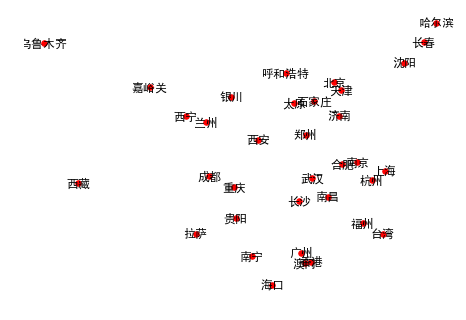

In [26]:
nx.draw(city_graph, city_location, with_labels=True, node_size=30)

In [43]:
from collections import defaultdict

In [50]:
simple_connect_info_src = {  # 使用几个点，建立一个比较简单的连接
    '北京': ['太原', '沈阳'],
    '太原': ['北京', '西安', '郑州'],
    '兰州': ['西安'],
    '西安': ['兰州', '长沙'],
    '长沙': ['福州', '南宁'],
}

In [51]:
simple_connect_info = defaultdict(list)
simple_connect_info.update(simple_connect_info_src)

In [52]:
simple_connect_info['澳门'] # 当遇到没有定义过的key时，也不会报错，而是返回一个[]

[]

In [58]:
def bfs(graph, start):
    """
    breath first search
    """
    visited = [start] 
    seen = set()
    # 给定一个连接关系，一个初始点
    while visited:
        froninter = visited.pop()
        
        if froninter in seen: continue
        for successor in graph[froninter]:
            if successor in seen: continue
            print(successor)
#             visited.append(successor)
            
            visited += [successor]
            
        seen.add(froninter)
        
    return seen # 查看遍历的顺序

In [59]:
bfs(simple_connect_info, '北京')

太原
沈阳
西安
郑州
兰州
长沙
福州
南宁


{'兰州', '北京', '南宁', '太原', '沈阳', '福州', '西安', '郑州', '长沙'}

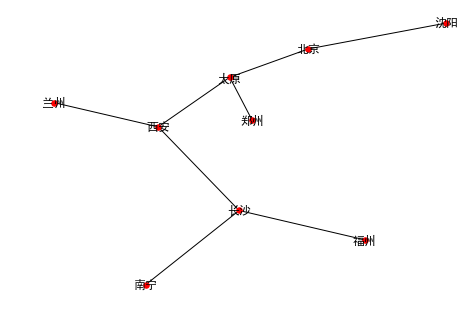

In [34]:
nx.draw(nx.Graph(simple_connect_info), city_location, with_labels=True, node_size=30)

In [37]:
def search(start, destination, connection_graph):
    pathes = [[start]] # 从1到2会探索很多条路线，所有路线都存储在pathes里
    
    visited = set()
           
    while pathes:  # if we find existing pathes
        path = pathes.pop(0)  # 第0个元素拿出来
        froninter = path[-1]
    
        if froninter in visited: continue # 如果这个城市被访问过了，就跳过
        
        successors = connection_graph[froninter]
        
        for city in successors:
            
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination: return new_path
            
        visited.add(froninter)
        

In [39]:
search('兰州', '福州', simple_connect_info)

['兰州', '西安', '长沙', '福州']

广度优先 breath first search (本节采用)
深度优先 deapth first search

In [40]:
def pretty_print(cities):
    print('🚗->'.join(cities))

In [41]:
pretty_print(search('兰州', '福州', simple_connect_info))

兰州🚗->西安🚗->长沙🚗->福州
